In [ ]:
import numpy as np
 import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


In [ ]:
# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize data to [0,1]
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Reshape to (28, 28, 1)
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to keep between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Flatten()(input_img)
encoded = Dense(64, activation='relu')(x)

# Decoder
x = Dense(784, activation='sigmoid')(encoded)
decoded = Reshape((28, 28, 1))(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test),
    verbose=0
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


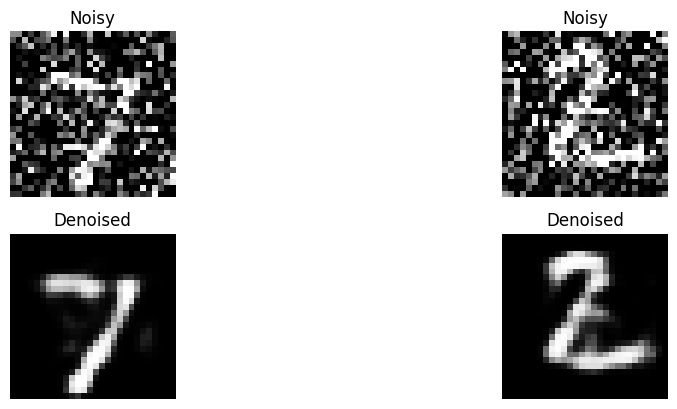

In [ ]:
# Predict denoised images for first 2 noisy test images
decoded_imgs = autoencoder.predict(x_test_noisy[:2])

# Display original, noisy, and denoised images for 2 samples
n = 2
plt.figure(figsize=(10, 6))
for i in range(n):


    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

plt.tight_layout()
plt.show()
